## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [36]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [37]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [38]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [39]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [40]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [41]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [42]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [43]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [44]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [45]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [46]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [47]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

# Memfilter data dengan valid = 1, Category = Mobiles & Tablets, transaksi selama 2022
filter_valid = df["is_valid"] == 1
filter_category = df["category"] == "Mobiles & Tablets"
filter_year = df["order_date"].dt.year == 2022

df_filtered = df[filter_valid & filter_category & filter_year]
df_filtered

#groupby berdasarkan sku_name
df_groupby = df_filtered.groupby('sku_name')['qty_ordered'].sum().reset_index()
df_groupby

#Mengurutkan data dan menampilkan 5 teratas
df_values = df_groupby.sort_values('qty_ordered',ascending = False)
df_values.head(5)

,sku_name,qty_ordered
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [48]:
# 1. Filter data valid dan tahun 2021/2022
df_2021 = df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2021)]
df_2022 = df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]

# 2. Group by kategori (bukan sku_name) dan jumlahkan qty
df_2021_grouped = df_2021.groupby('category')['qty_ordered'].sum().reset_index()
df_2022_grouped = df_2022.groupby('category')['qty_ordered'].sum().reset_index()

# 3. Gabungkan data dengan fillna(0) untuk handle missing values
df_merged = pd.merge(
    df_2021_grouped,
    df_2022_grouped,
    on='category',
    how='outer',
    suffixes=('_2021', '_2022')
).fillna(0)

# 4. Hitung selisih penjualan
df_merged['qty_decreased'] = df_merged['qty_ordered_2022'] - df_merged['qty_ordered_2021']

# 5. Filter kategori "Others" dan urutkan
others_sales = df_merged[(df_merged['category'] == 'Others')].sort_values('qty_decreased')

# 6. Tampilkan 15 kategori teratas (termasuk Others)
top_15_categories = df_merged.sort_values('qty_decreased').head(15)

print("Penjualan Kategori 'Others':")
print(others_sales)

print("\n15 Kategori dengan Penurunan Terbesar:")
print(top_15_categories)

Penjualan Kategori 'Others':
   category  qty_ordered_2021  qty_ordered_2022  qty_decreased
10   Others               426               263           -163

15 Kategori dengan Penurunan Terbesar:
              category  qty_ordered_2021  qty_ordered_2022  qty_decreased
10              Others               426               263           -163
12             Soghaat               759               612           -147
8          Men Fashion               237               175            -62
1    Beauty & Grooming               168               153            -15
2                Books               171               195             24
0           Appliances               124               148             24
5      Health & Sports               173               200             27
3            Computing               109               153             44
11  School & Education               184               237             53
6        Home & Living               193               250       

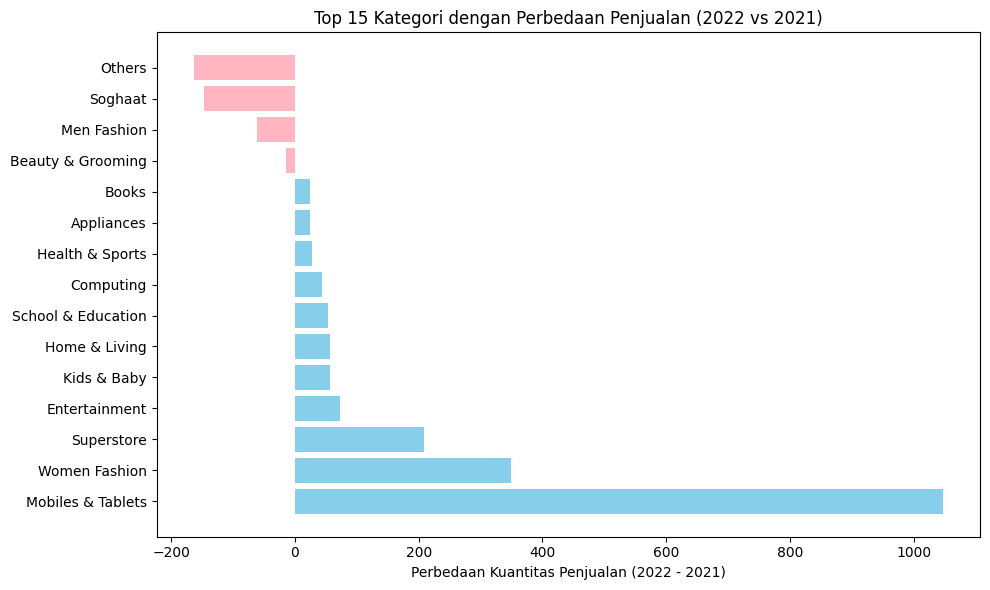

In [49]:
# Membuat figure ukuran 10 x 6
plt.figure(figsize=(10, 6))

# Membuat grafik batang horizontal
plt.barh(
    top_15_categories['category'],
    top_15_categories['qty_decreased'],
    color=[
        'skyblue' if x >= 0 else '#FFB6C1'
        for x in top_15_categories['qty_decreased']
    ]
)

# Label sumbu X
plt.xlabel('Perbedaan Kuantitas Penjualan (2022 - 2021)')

# Judul grafik
plt.title('Top 15 Kategori dengan Perbedaan Penjualan (2022 vs 2021)')

# Membalik sumbu Y supaya kategori dengan penurunan terbesar di atas
plt.gca().invert_yaxis()

# Merapikan layout
plt.tight_layout()

# Menampilkan grafik
plt.show()

## `Jawaban No 2.2`

In [50]:
# 1. Filter data valid kategori 'Others' tahun 2021 dan group by sku_name
qty_2021 = df[
    (df['is_valid'] == 1) &
    (df['category'] == 'Others') &
    (df['order_date'].dt.year == 2021)
].groupby('sku_name')['qty_ordered'].sum().reset_index().rename(columns={'qty_ordered': 'qty_2021'})

# 2. Filter data valid kategori 'Others' tahun 2022 dan group by sku_name
qty_2022 = df[
    (df['is_valid'] == 1) &
    (df['category'] == 'Others') &
    (df['order_date'].dt.year == 2022)
].groupby('sku_name')['qty_ordered'].sum().reset_index().rename(columns={'qty_ordered': 'qty_2022'})

# 3. Merge data 2021 dan 2022
sales_comparison = pd.merge(qty_2021, qty_2022, on='sku_name', how='outer')

# 4. Handle missing values (produk yang hanya ada di salah satu tahun)
sales_comparison.fillna(0, inplace=True)

# 5. Hitung selisih penjualan
sales_comparison['qty_diff'] = sales_comparison['qty_2022'] - sales_comparison['qty_2021']

# 6. Tampilkan 20 produk teratas berdasarkan penurunan penjualan
top_20_decreased = sales_comparison.sort_values('qty_diff').head(20)

print("Perbandingan Penjualan Kategori 'Others' (2021 vs 2022):")
print(top_20_decreased)

Perbandingan Penjualan Kategori 'Others' (2021 vs 2022):
                                              sku_name  qty_2021  qty_2022  \
69                       RB_Dettol Germ Busting Kit-bf     200.0      45.0   
18                            Dawlance_MD 10 + DWB 600      23.0       0.0   
84                                 Telemall_MM-DR-HB-L      23.0       2.0   
137             iu_Tickets General Enclosure-Islamabad      20.0       0.0   
70                      RS_Rehmat-e-Shereen Mix Mithai      13.0       0.0   
141                                    kansai_NeverWet      10.0       1.0   
154                        sindbad_Sindbad Gift Card-3       7.0       0.0   
133                                         emart_00-1       7.0       1.0   
93                                      Vouch 365 2016       5.0       0.0   
4                                     Am-PTV_ATS-004-M       5.0       0.0   
129                                 duma_4561253300294       4.0       0.0   
155    

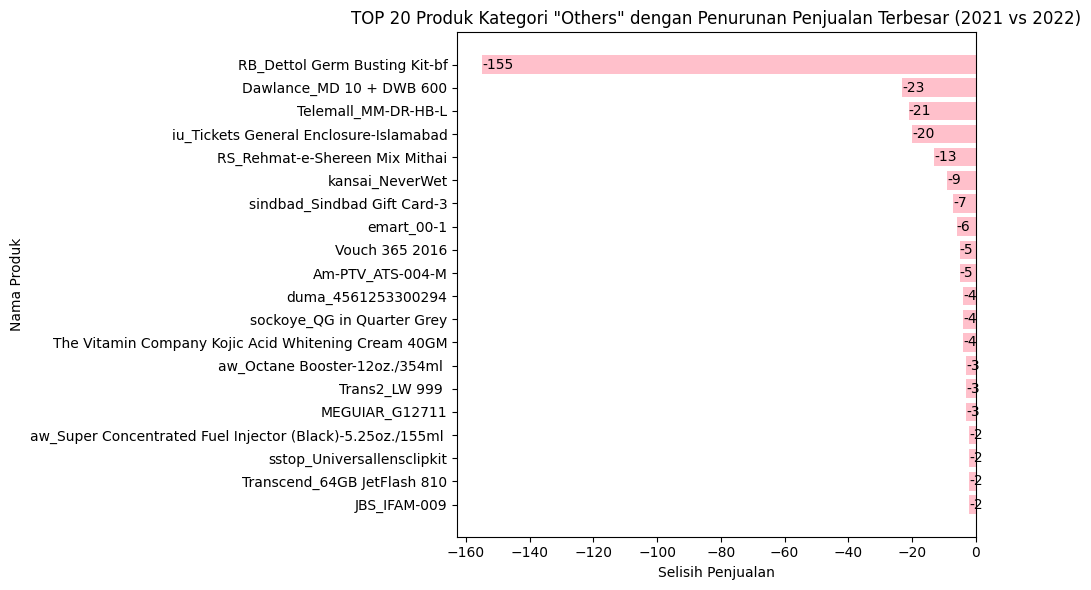

In [51]:
# Membuat grafik bar horizontal
plt.figure(figsize=(10, 6))

# membuat grafik horizontal dengan 'barh'
plt.barh(
    top_20_decreased['sku_name'],
    top_20_decreased['qty_diff'],
    color='pink'
)
plt.xlabel('Selisih Penjualan')
plt.ylabel('Nama Produk')
plt.title('TOP 20 Produk Kategori "Others" dengan Penurunan Penjualan Terbesar (2021 vs 2022)')
plt.gca().invert_yaxis() # Membalik urutan tabel pada sumbu Y agar produk yang memiliki urutan terbesar berada diatas

#Menambahkan angka ditengah bar agar memudahkan membaca
for index, value in enumerate(top_20_decreased['qty_diff']):
    plt.text(
        value,
        index,
        f'{value:.0f}',
        va='center'
    )
plt.tight_layout() #Untuk merapikan tata letak grafik, memastikan semua terlihat jelas
plt.show()

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [52]:
#Memfilter data dengan gross = 1
df_gross = df[df['is_gross'] == 1]
df_gross

#Memfilter data dengan valid = 0
df_valid = df_gross[df_gross['is_valid'] == 0]
df_valid

#Memfilter data dengan net = 0
df_net = df_valid[df_valid['is_net'] == 0]
df_net

# Memfilter data pada tahun 2022
df_2022 = df_net[df_net['order_date'] .dt.year == 2022]
df_2022

#Tampilkan hanya Id Customer dan Registered Id
df_customers = df_2022[['customer_id', 'registered_date']]

# Mendapatkan DataFrame dengan customer_id yang unik menggunakan drop_duplicates()
df_unique_customers = df_customers.drop_duplicates(subset=['customer_id'])
df_unique_customers

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [53]:
# mengekstrak tahun dari kolom registered_date yang sudah ada
df_unique_customers['tahun'] = df_unique_customers['registered_date'].dt.year

# Mengelompokkan berdasarkan tahun dan menghitung customer Id sebagai jumlah konsumen
customer_count_by_year = df_unique_customers.groupby('tahun')['customer_id'].count().reset_index()

# Hanya Menampilkan Tahun dan Jumlah Konsumen
customer_count_by_year = customer_count_by_year[['tahun', 'customer_id']]

# Mengurutkan berdasarkan tahun
customer_count_by_year = customer_count_by_year.sort_values('tahun')

/tmp/ipython-input-3909680479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_customers['tahun'] = df_unique_customers['registered_date'].dt.year


In [54]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df_unique_customers.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

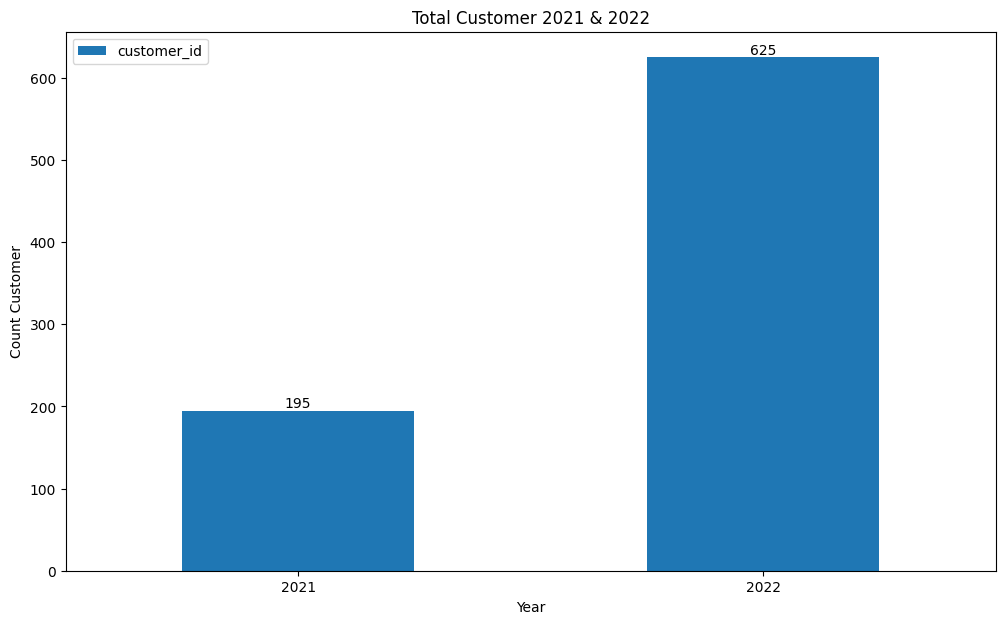

In [55]:
#Membuat grafik menggunakan DataFrame.plot()
df_grafik = customer_count_by_year.plot(x='tahun',
           y=['customer_id'],
           kind='bar',
           grid = False,
           xlabel = 'Year',
           ylabel = 'Count Customer',
           figsize=(12,7),
           rot = 0, #Rotasi label x
           title = 'Total Customer 2021 & 2022' )

# menambahkan total count di atas setiap batang
# Mengakses objek batang dari container di objek Axes
for container in df_grafik.containers:
    df_grafik.bar_label(container, label_type='edge') # 'edge': Menempatkan label di tepi luar batang.

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [68]:
# Membuat Kolom Baru day,month_name, month
df['day']=df['order_date'].dt.day_name()
df['month_name']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month

# Memfitler Data Valid
df_valid = df[df['is_valid'] == 1]
df_valid

# Membuat Dataframe Weekends dari Okt - Des 2022
df_valid = df_valid[(df_valid['month_num'].isin([10,11,12])) & (df_valid['order_date'].dt.year == 2022)]
df_valid

# Memfilter Data dari Weekends & Weekdays 2022
weekends = df_valid[df_valid['day'].isin(['Saturday','Sunday'])]
weekdays = df_valid[df_valid['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]

# Group by Weekends
grup_weekends = weekends.groupby(['month_name','month_num'])['before_discount'].mean().reset_index()
display(grup_weekends)

# Group By Weekdays month_name & month_num, pilih rata-rata before_discount
grup_weekdays = weekdays.groupby(['month_name','month_num'])['before_discount'].mean().reset_index()
display(grup_weekdays)

# Rename before_discount pada rataan_weekends & rataan_weekdays
grup_weekends = grup_weekends.rename(columns={'before_discount':'rataan_weekends'})
grup_weekdays = grup_weekdays.rename(columns={'before_discount':'rataan_weekdays'})

# Merge weekends & weekdays
weekends_weekdays= pd.merge(grup_weekends, grup_weekdays, on=['month_num','month_name'], how='outer')
weekends_weekdays['development'] = weekends_weekdays['rataan_weekends'] - weekends_weekdays['rataan_weekdays']
display(weekends_weekdays)

,month_name,month_num,before_discount
0,December,12,410599.400000
1,November,11,607794.210526
2,October,10,634260.074074


,month_name,month_num,before_discount
0,December,12,813574.285714
1,November,11,641862.000000
2,October,10,874690.266667


,month_name,month_num,rataan_weekends,rataan_weekdays,development
0,October,10,634260.074074,874690.266667,-240430.192593
1,November,11,607794.210526,641862.000000,-34067.789474
2,December,12,410599.400000,813574.285714,-402974.885714


<Figure size 1200x600 with 0 Axes>

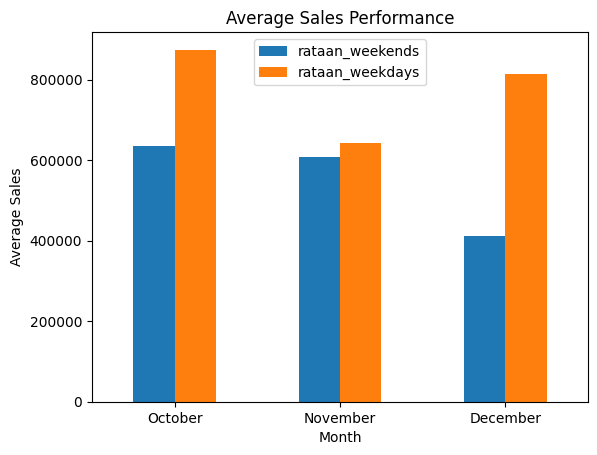

In [57]:
# Menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
weekends_weekdays.set_index('month_name')[['rataan_weekends','rataan_weekdays']].plot(kind='bar')
plt.title('Average Sales Performance')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


## `Jawaban No 4.2`

In [65]:
# Merge weekends & weekdays
weekends_weekdays = pd.merge(grup_weekends, grup_weekdays, on=['month_num','month_name'], how='outer')
weekends_weekdays

#Menghitung rata-rata weekends & weekdays
rataan_weekends = weekends_weekdays['rataan_weekends'].mean().round(2)
rataan_weekdays = weekends_weekdays['rataan_weekdays'].mean().round(2)
diff_avg = (rataan_weekends - rataan_weekdays)
diff_percentage = ((rataan_weekends - rataan_weekdays) / rataan_weekdays * 100)
diff_percentage

#Membuat Data Frame
avg_3month = pd.DataFrame({'Periode':'Total 3 Bulan',
                            'rataan_weekends':[rataan_weekends],
                            'rataan_weekdays':[rataan_weekdays],
                            'diff' : [diff_avg],
                            'diff_percentage' : [diff_percentage]
})
display(avg_3month)


,Periode,rataan_weekends,rataan_weekdays,diff,diff_percentage
0,Total 3 Bulan,550884.56,776708.85,-225824.29,-29.07451


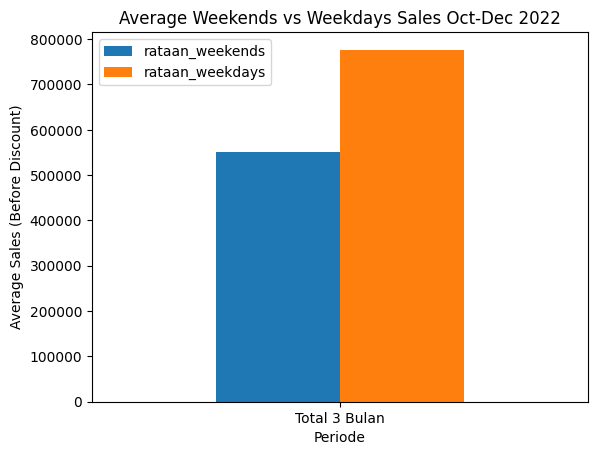

In [66]:
# Menampilkan Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

avg_3month = avg_3month.copy()
avg_3month.plot(x='Periode', y=['rataan_weekends','rataan_weekdays'], kind='bar', stacked=False)
plt.title('Average Weekends vs Weekdays Sales Oct-Dec 2022')
plt.xlabel('Periode')
plt.ylabel('Average Sales (Before Discount)')
plt.xticks(rotation=0)
plt.show()